# What is the most optimal skill to learn for Data Analysts?

### Methodology 

1. Continue from last notebook to find percent of postings with skill
2. Visualize median salary vs percent skill demand
3. Determine if certain technologies are more prevalent

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Filter for EU Data Analyst roles

In [2]:
# Define list of EU countries
EU_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']

df_DA_EU = df[(df['job_country'].isin(EU_countries)) & (df['job_title_short'] == 'Data Analyst')]

## Clean Data

Drop NaN values from the 'salary_year_avg' column. Then it uses the ``explode`` method on the job_skills column to create a new row in a new DataFrame (``df_DA_EU_explode``) for each skill associated with a job. Finally, it displays the first 5 entries of the ``salary_year_avg`` and ``job_skills`` columns.

In [3]:
df_DA_EU = df_DA_EU.dropna(subset=['salary_year_avg'])

df_DA_EU_exploded = df_DA_EU.explode('job_skills')

df_DA_EU_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
1490,43200.0,gdpr
1490,43200.0,sap
1490,43200.0,powerpoint
1490,43200.0,excel
1555,111175.0,databricks


## Calculate Percent of Job Postings that Have Skills

Group the data by job skills and calculates the count and median salary for each skill, sorting the results in descending order by count. It then renames the columns. Calculates the percentage that each skill count represents out of the total number of Data Analyst jobs. Finally, filter out any skills that don't have any jobs associated with them.

In [4]:
df_DA_skills = df_DA_EU_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count' : 'skill_count', 'median' : 'median_salary'})

DA_job_count = len(df_DA_EU)

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

df_DA_skills


,skill_count,median_salary,skill_percent
job_skills,,,
sql,195,100500.0,50.257732
python,142,98500.0,36.597938
tableau,102,98500.0,26.288660
excel,87,72900.0,22.422680
power bi,62,89152.0,15.979381
...,...,...,...
c,1,200000.0,0.257732
rust,1,98500.0,0.257732
perl,1,56700.0,0.257732


## Median Salary vs Percent Skill Demand

Filters for Data Analyst skills that exceed a certain percentage (``skill_limit``).

In [5]:
skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

Create a scatter plot to visualize the relationship between the percentage of Data Analyst jobs that require specific skills and the median salary for those skills.

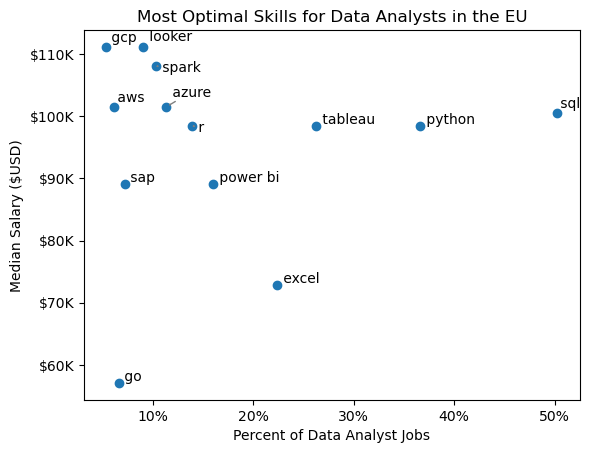

In [6]:
from adjustText import adjust_text

plt.scatter(df_DA_skills_high_demand['skill_percent'], df_DA_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)') 
plt.title('Most Optimal Skills for Data Analysts in the EU')

from matplotlib.ticker import PercentFormatter

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')) 
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()


## Bonus: Coloring by Technology

We're going to add color labels based on technology.

Removes duplicate entries and any rows with missing values. Then, it combines all dictionary entries into a single dictionary, summing values for keys that repeat across entries. To ensure each key's values are unique, it converts the values to a set and then back to a list. The final result is a dictionary where each key represents a skill and each value is a list of unique attributes associated with that skill.

In [7]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['visio',
  'sheets',
  'tableau',
  'microstrategy',
  'ssrs',
  'looker',
  'alteryx',
  'power bi',
  'cognos',
  'word',
  'ssis',
  'powerpoint',
  'excel',
  'qlik',
  'nuix',
  'esquisse',
  'sas',
  'outlook',
  'datarobot',
  'ms access',
  'msaccess',
  'sharepoint',
  'spss',
  'splunk',
  'spreadsheet',
  'dax',
  'sap',
  'powerbi'],
 'programming': ['sql',
  'php',
  'mongodb',
  'matlab',
  'scala',
  'c',
  'objective-c',
  't-sql',
  'dart',
  'nosql',
  'ocaml',
  'clojure',
  'crystal',
  'javascript',
  'assembly',
  'elixir',
  'apl',
  'groovy',
  'visualbasic',
  'c#',
  'solidity',
  'r',
  'python',
  'lua',
  'vb.net',
  'shell',
  'haskell',
  'mongo',
  'lisp',
  'ruby',
  'fortran',
  'sas',
  'c++',
  'golang',
  'rust',
  'bash',
  'powershell',
  'vba',
  'julia',
  'no-sql',
  'go',
  'sass',
  'kotlin',
  'visual basic',
  'swift',
  'typescript',
  'java',
  'html',
  'perl',
  'cobol',
  'pascal',
  'delphi',
  'erlang',
  'f#',
  '

This code converts a dictionary into a pandas DataFrame, then explodes the 'skills' column, creating multiple rows for each 'technology' entry if it contains multiple skills.

In [8]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,visio
0,analyst_tools,sheets
0,analyst_tools,tableau
0,analyst_tools,microstrategy
0,analyst_tools,ssrs
...,...,...
9,sync,microsoft teams
9,sync,wire
9,sync,mattermost
9,sync,twilio


Merges two DataFrames, ``df_DA_skills`` and ``df_technology``, based on the columns 'job_skills' and 'skills' respectively, creating a new DataFrame ``df_DA_skills_tech``.

In [11]:
# merge df_DA_skills and df_technology
df_DA_skills_tech = df_DA_skills.merge(df_technology, left_on='job_skills', right_on='skills')

df_DA_skills_tech

,skill_count,median_salary,skill_percent,technology,skills
0,195,100500.0,50.257732,programming,sql
1,142,98500.0,36.597938,programming,python
2,102,98500.0,26.288660,analyst_tools,tableau
3,87,72900.0,22.422680,analyst_tools,excel
4,62,89152.0,15.979381,analyst_tools,power bi
...,...,...,...,...,...
101,1,200000.0,0.257732,programming,c
102,1,98500.0,0.257732,programming,rust
103,1,56700.0,0.257732,programming,perl
104,1,111175.0,0.257732,programming,php


Filters ``df_DA_skills_tech`` to select rows where the 'percent' column exceeds a specified threshold, storing the result in ``df_DA_skills_tech_high_demand``.

In [13]:
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

Plot the results in a scatter plot, coloring the points based on the 'technology' column.

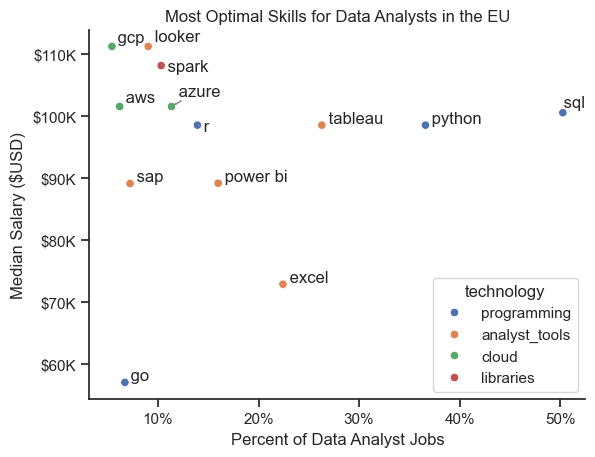

In [14]:
from adjustText import adjust_text

#plt.scatter(df_plot['skill_percent'], df_DA_skills_high_demand['median_salary'])
sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)
sns.despine()
sns.set_theme(style='ticks')
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)') 
plt.title('Most Optimal Skills for Data Analysts in the EU')

from matplotlib.ticker import PercentFormatter

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')) 
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()